In [1]:
import os
os.chdir('/home/tzd/Hg_dataset_practice/Analysis_of_ASGM_Emissions_in_Peru')

In [2]:
%matplotlib inline
import numpy as np

import xarray as xr

#import regionmask 

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import numpy.ma as ma
import csv
#import netCDF4 as nc
import scipy
import pandas
from glob import glob
import pandas as pd
import cartopy.feature as cf
import geopandas as gpd
from shapely.geometry import Point
import geoplot as gplt

import warnings
warnings.filterwarnings('ignore')



np.seterr(invalid='ignore'); # disable a warning from matplotlib and cartopy
from gamap_colormap import WhGrYlRd  # import the "WhGrYlRd" variable from my custom Python script
type(WhGrYlRd)  # our cus

matplotlib.colors.ListedColormap

In [3]:
sf_nm = "/net/fs03/d0/arifein/shapefiles/gadm36_PER_shp/gadm36_PER_0.shp"
peru_sf = gpd.read_file(sf_nm)

In [4]:
cols=['Name','Latitude','Longitude']
data=[['Calhau Sao Vincente',16.86402,-24.8673],['Manaus',-2.8906,-59.9698],['Sisal',21.16356,-90.04679],['Chacaltaya',-16.2,-68.12],['Nieuw Nickerie',5.93,-56.98]]# ['Celestún',20.8584,-90.3831],,['Galápagos Islands',-0.95,-90.97] ['Bariloche',-41.13,-71.42],
import pandas as pd
df = pd.DataFrame(data, columns = cols)
 
sites=gpd.GeoDataFrame(df, geometry = gpd.points_from_xy(df['Longitude'],df['Latitude'] ))
sites

,Name,Latitude,Longitude
0,Calhau Sao Vincente,16.86402,-24.86730
1,Manaus,-2.89060,-59.96980
2,Sisal,21.16356,-90.04679
3,Chacaltaya,-16.20000,-68.12000
4,Nieuw Nickerie,5.93000,-56.98000


In [6]:
Lapan= pd.read_csv('Lapan.csv')
# Creating GeoPandas GeoDataFrame using the Pandas Dataframe 
Lapan_gdf = gpd.GeoDataFrame(Lapan, geometry = gpd.points_from_xy(Lapan['Longitude'],Lapan['Latitude'] ))
Lapan_gdf=Lapan_gdf.sort_values('Latitude') #sort the data from passive samplers by latitude 


LAP=pd.DataFrame()
LAP['LONG']=Lapan_gdf['Longitude']
LAP['LATI']=Lapan_gdf['Latitude']
LAP['OBS']=Lapan_gdf['Measured Conc (ng/m3)']
LAP =LAP.reset_index(drop=True)
LAP =LAP.reset_index(drop=True)
LAP['OBS'].iloc[20]=0.59 # Choose the concentration recorded at 5m at Manaus becasue theese sould be surface concentrations
#The observations are currently recorded as strings. They need to be changed to floating point numbers
observe=[]
for item in LAP['OBS']:
    observe.append(float(item))
observe    
LAP['OBS']=observe

df_Latin = gpd.GeoDataFrame(LAP , geometry = gpd.points_from_xy(LAP['LONG'],LAP['LATI'] ))
L_OB_GEO =df_Latin.drop(columns=['LATI','LONG']) 
#L_OB_GEO

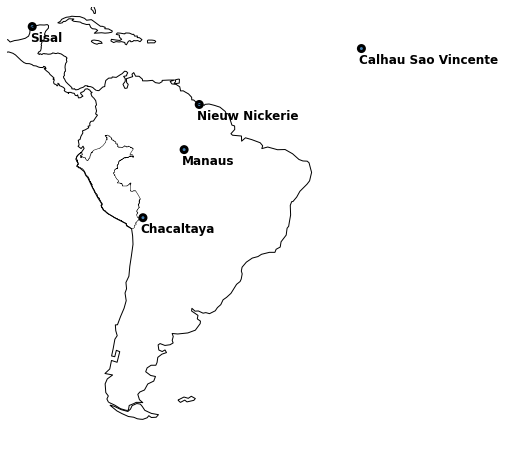

In [39]:
fig, axes = plt.subplots(1, 1, figsize=[10,8], subplot_kw={'projection': ccrs.PlateCarree()})
texts = []
from shapely.geometry import Point
import adjustText as aT
        

gplt.pointplot(sites.geometry,ax=axes, edgecolor='black', linewidth=3,s = 6)
for x, y, label in zip(sites.geometry.x, sites.geometry.y, sites["Name"]):
    texts.append(plt.text(x-0.5, y-3, label, fontsize = 12,fontweight='bold'))
peru_sf.geometry.boundary.plot(ax=axes, edgecolor='k',linewidth = 0.5)
# aT.adjust_text(texts, force_points=0.5, force_text=0.9, expand_points=(1,1), expand_text=(1,1.3), 
            # arrowprops=dict(arrowstyle="-", color='grey', lw=1))
# axes.set_title(f'Mercury Monitoring Stations in Latin America',fontweight='bold')
axes.coastlines()
axes.set_xlim([-95, -20])
axes.set_ylim([-60, 25])
name='GMOS_map'
savepath='/home/tzd/fs03/d1/tzd/Data_analysis/MIT_TPP_thesis/figures/GMOS_Sites/'+name+'.pdf'
fig.savefig(savepath,bbox_inches='tight')
plt.show()

In [31]:
!pwd

/net/fs03/d0/arifein/python


In [68]:
Lapan= pd.read_csv('/home/tzd/fs03/d1/tzd/Data_analysis/MIT_TPP_thesis/JPnotebooks/LATAM_Passive_Sampler_Data_Analysis/LapanData.csv')
# Creating GeoPandas GeoDataFrame using the Pandas Dataframe 
Lapan_gdf = gpd.GeoDataFrame(Lapan, geometry = gpd.points_from_xy(Lapan['Longitude'],Lapan['Latitude'] ))

Lapan_gdf=Lapan_gdf.sort_values('Longitude')
Lapan_gdf['Longitude']=Lapan_gdf['Longitude'].round()
Lapan_gdf['Latitude']=Lapan_gdf['Latitude'].round()
Lapan_gdf



,Site,Latitude,Longitude,Date of deployment,Date of removal,Deployment length (days),Measured Conc (ng/m3),geometry
24,Tegucigalpa,14.0,-87.0,2017-11-14,2018-11-14 00:00:00,365,1.95,POINT (-87.20278 14.09750)
22,Abangares,10.0,-85.0,2018-04-23,2019-11-22 00:00:00,578,6.87,POINT (-84.95556 10.28750)
21,San Jose Downtown,10.0,-84.0,2018-03-24,2019-05-20 00:00:00,422,0.71,POINT (-84.07528 9.93806)
23,Corcovado,9.0,-83.0,2018-05-17,2019-09-26 00:00:00,497,0.56,POINT (-83.40728 8.52928)
18,"Rio Branco, Manizales",5.0,-75.0,2017-12-27,2018-12-27 00:00:00,365,1.25,POINT (-75.43694 5.07583)
20,PNN Brisas,5.0,-75.0,2018-01-27,2018-12-26 00:00:00,333,1.18,POINT (-75.34276 4.97103)
15,Glacie Dawin (Schapiarelli),-54.0,-71.0,2019-04-20,"March 14, 2020",329,0.79,POINT (-70.91570 -54.41440)
19,Arauca,7.0,-71.0,2018-01-22,2019-01-04 00:00:00,347,0.91,POINT (-70.74461 7.01271)
17,"Amazonía, Leticia",-4.0,-70.0,2017-12-14,2019-01-09 00:00:00,391,0.97,POINT (-69.93944 -4.19153)
16,Chacaltaya,-16.0,-68.0,2018-07-05,2019-07-01 00:00:00,361,1.68,POINT (-68.13160 -16.35036)


In [77]:
LAP=pd.DataFrame()
LAP['LONG']=Lapan_gdf['Longitude']
LAP['LATI']=Lapan_gdf['Latitude']
LAP['OBS']=Lapan_gdf['Measured Conc (ng/m3)']
LAP['Site']=Lapan_gdf['Site']

LAP =LAP.reset_index(drop=True)
LAP

,LONG,LATI,OBS,Site
0,-87.0,14.0,1.95,Tegucigalpa
1,-85.0,10.0,6.87,Abangares
2,-84.0,10.0,0.71,San Jose Downtown
3,-83.0,9.0,0.56,Corcovado
4,-75.0,5.0,1.25,"Rio Branco, Manizales"
5,-75.0,5.0,1.18,PNN Brisas
6,-71.0,-54.0,0.79,Glacie Dawin (Schapiarelli)
7,-71.0,7.0,0.91,Arauca
8,-70.0,-4.0,0.97,"Amazonía, Leticia"
9,-68.0,-16.0,1.68,Chacaltaya


In [78]:

LAP['OBS'].iloc[14]=0.59 # Choose the concentration recorded at 5m at Manaus becasue theese sould be surface concentrations
LAP

,LONG,LATI,OBS,Site
0,-87.0,14.0,1.95,Tegucigalpa
1,-85.0,10.0,6.87,Abangares
2,-84.0,10.0,0.71,San Jose Downtown
3,-83.0,9.0,0.56,Corcovado
4,-75.0,5.0,1.25,"Rio Branco, Manizales"
5,-75.0,5.0,1.18,PNN Brisas
6,-71.0,-54.0,0.79,Glacie Dawin (Schapiarelli)
7,-71.0,7.0,0.91,Arauca
8,-70.0,-4.0,0.97,"Amazonía, Leticia"
9,-68.0,-16.0,1.68,Chacaltaya


In [79]:

#The observations are currently recorded as strings. They need to be changed to floating point numbers
observe=[]
for item in LAP['OBS']:
    observe.append(float(item))
observe    
LAP['OBS']=observe

In [80]:
 df_Latin = gpd.GeoDataFrame(LAP , geometry = gpd.points_from_xy(LAP['LONG'],LAP['LATI'] ))
 L_OB_GEO =df_Latin.drop(columns=['LATI','LONG']) 

In [86]:
list(L_OB_GEO['Site'])

['Tegucigalpa',
 'Abangares',
 'San Jose Downtown',
 'Corcovado',
 'Rio Branco, Manizales',
 'PNN Brisas',
 'Glacie Dawin (Schapiarelli)',
 'Arauca',
 'Amazonía, Leticia',
 'Chacaltaya',
 'Villa Regina',
 'Salta',
 'Puruzinho, AM',
 'Bahia Blanca (after)',
 'Manaus, AM (ATTO Tower)',
 'Cristalino State Park, MT',
 'Iguaçu National Park, PR',
 'Rio Grande, RS',
 'Rio Grande, RS (Praça Tamandaré)',
 'Nova Nazaré, MT',
 'São José dos Ausentes, RS',
 'Pico do Jaraguá, SP',
 'Itatiaia National Park, RJ',
 'São Luis do maranhão, MA',
 'Moeda, MG',
 'Abrolhos (Redonda Island), BA',
 'Rocas Atoll, RN',
 'Trindade Island']

In [82]:
L_OB_GEO

,OBS,Site,geometry
0,1.95,Tegucigalpa,POINT (-87.00000 14.00000)
1,6.87,Abangares,POINT (-85.00000 10.00000)
2,0.71,San Jose Downtown,POINT (-84.00000 10.00000)
3,0.56,Corcovado,POINT (-83.00000 9.00000)
4,1.25,"Rio Branco, Manizales",POINT (-75.00000 5.00000)
5,1.18,PNN Brisas,POINT (-75.00000 5.00000)
6,0.79,Glacie Dawin (Schapiarelli),POINT (-71.00000 -54.00000)
7,0.91,Arauca,POINT (-71.00000 7.00000)
8,0.97,"Amazonía, Leticia",POINT (-70.00000 -4.00000)
9,1.68,Chacaltaya,POINT (-68.00000 -16.00000)


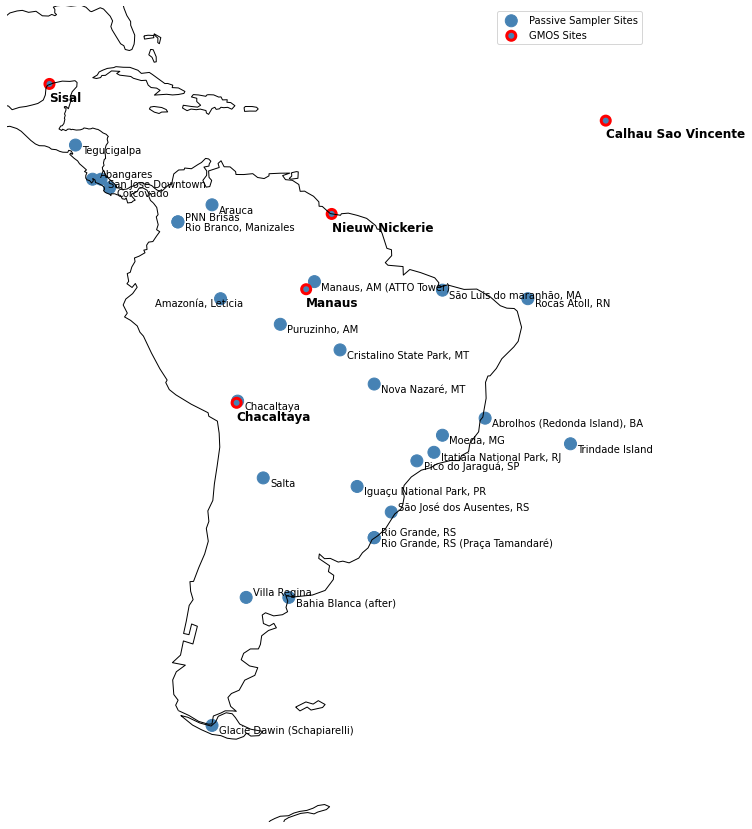

In [110]:
import matplotlib as mpl
fig = plt.figure(figsize=[15,15])
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())
norm = mpl.colors.Normalize(vmin=0, vmax=7)
cmap = mpl.cm.ScalarMappable(norm=norm, cmap=WhGrYlRd).cmap

#LAPA.plot(ax=ax, #set the axis
                        #levels = np.arange(0, 5, .01), #set the levels for our colorbars
                       #extend='both',#extend the colorbar in both directions
                       #transform=ccrs.PlateCarree(), #fit data into map
                       #cbar_kwargs={'label':ds_a['IJ-AVG-S_Hg0'].attrs['unit']}, #label our colorbar (use ds_a just to get units)
                       # cmap=cmap,norm=norm)  #choose color for our colorbar
#L_OB_GEO.plot(ax=ax,marker='o',levels = np.arange(0, 5, .01),cmap='hsv', markersize=20,)
modify_axes=['Abangares','Rio Grande, RS','Villa Regina','PNN Brisas','São José dos Ausentes, RS']
gplt.pointplot(L_OB_GEO,norm=norm,ax=ax,linewidth=1,s = 12,
               label='Passive Sampler Sites')
#peru_sf.geometry.boundary.plot(ax=axes, edgecolor='k',linewidth = 0.5)
xcheck=[]
ycheck = []
for x, y, label in zip(L_OB_GEO.geometry.x, L_OB_GEO.geometry.y, L_OB_GEO.Site):
    if label =='Amazonía, Leticia':
        x=x-len(label)/2
    ax.annotate(label, xy=(x, y),xytext=(7, 0), textcoords="offset points",
        horizontalalignment="left",
        verticalalignment="bottom" if label in modify_axes else "top")
        

gplt.pointplot(sites.geometry,ax=ax,edgecolor='red', linewidth=3,s =9,label='GMOS Sites')
for x, y, label in zip(sites.geometry.x, sites.geometry.y, sites["Name"]):
    texts.append(plt.text(x, y-2, label, fontsize = 12,fontweight='bold'))
        
ax.coastlines() #add coastlines

ax.set_extent([-95, -20, -60, 25])
# gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                #   linewidth=0.3, color='gray', alpha=0.5, linestyle='--')
# gl.xlabels_top = False
# gl.ylabels_left = True
# gl.ylabels_right = False
# gl.xlines = True
# gl.ylines = True
plt.legend()
name='Latam_Passive_SamplerSites'
savepath='/home/tzd/fs03/d1/tzd/Data_analysis/MIT_TPP_thesis/figures/Passive_Samplers/'+name+'.pdf'
fig.savefig(savepath,bbox_inches='tight')